# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.stats import ttest_1samp, ttest_ind

# Pastries

A french cake shop claims that the average number of pastries they can produce in a day exceeds 500. The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard deviation for the pastries produced per day is 125. Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

In [8]:
# Ho : mu = 500
# Ha : mu > 500

z_stat= (530-500)/(125/np.sqrt(70))
print("z_stat : ",z_stat)
alpha = 0.05
print("alpha : ",alpha)

p_value=1-norm.cdf(z_stat)
print("p_value : ",p_value)

if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

z_stat :  2.007984063681781
alpha :  0.05
p_value :  0.022322492581293485
Reject Ho


In [10]:
observed = 530 
z_critical_value = norm.ppf(0.95)
print("z_critical_value : ",z_critical_value)

z_critical_value :  1.6448536269514722


In [ ]:
# z= x-mu/(sigma/np.sqrt(n))

In [15]:
mu = 500
observed_value = 530 
critical_value = mu + z_critical_value*(125/np.sqrt(70))
print("critical_value : ",critical_value)
print("observed_value : ",observed_value)

critical_value :  524.574701413748
observed_value :  530


In [16]:
# for a right tailed test
if critical_value < observed_value :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

Reject Ho


In [17]:
norm.ppf(q=0.95,loc=500,scale=(125/np.sqrt(70)))

524.574701413748

# Improve IQ with a pill

Population IQ average = 100


One researcher claims that his pill will improve IQ

In [18]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [19]:
np.mean(iq_scores)

103.5

In [ ]:
#Establish with 99% confidence ( alpha = 0.01)


In [31]:
# Ho : mu = 100 ( pill had not effect)
# Ha : mu > 100 ( pill had an effect)

In [35]:
t_stat,p_value=ttest_1samp(iq_scores,100,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.01
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  1.5071573172061195
p_value :  0.08774972467925055
Fail to Reject Ho


In [39]:
t_stat1= (103.5-100)/(( pd.Series(iq_scores).std()/np.sqrt(8)))
print("t_stat1 : ",t_stat1)

t_stat1 :  1.5071573172061195


In [43]:
p_value1=1-t.cdf(t_stat1,df=7)
print("p_value1 : ",p_value1)
if p_value1 < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

p_value1 :  0.08774972467925057
Fail to Reject Ho


# T Distribution

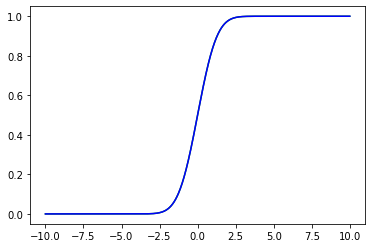

In [30]:
x_values= np.linspace(-10,10,1000)
y_values= norm.cdf(x_values)

plt.plot ( x_values, y_values,color= "green")

y_values1= t.cdf(x_values,df=10000)

plt.plot ( x_values, y_values1,color= "blue")

# IQ across 2 schools

In [44]:
df_iq = pd.read_csv("iq_two_schools.csv")

In [47]:
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [52]:
iq_1= df_iq.loc[df_iq["School"]=="school_1"]["iq"]
iq_2= df_iq.loc[df_iq["School"]=="school_2"]["iq"]


In [53]:
iq_1.mean()

101.15384615384616

In [54]:
iq_2.mean()

109.41666666666667

In [55]:
# Ho : mu1 = mu2 
# Ha1 : mu1 > mu2 
# Ha2 : mu1 < mu2 
# Ha3 : mu1 != mu2 


In [57]:
t_stat,p_value=ttest_ind(iq_1,iq_2,alternative="two-sided")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  -2.4056474861512704
p_value :  0.02004552710936217
Reject Ho


In [58]:
t_stat,p_value=ttest_ind(iq_1,iq_2,alternative="less")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  -2.4056474861512704
p_value :  0.010022763554681085
Reject Ho


In [59]:
t_stat,p_value=ttest_ind(iq_2,iq_1,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  2.4056474861512704
p_value :  0.010022763554681085
Reject Ho


In [60]:
t_stat,p_value=ttest_ind(iq_1,iq_2,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  -2.4056474861512704
p_value :  0.9899772364453189
Fail to Reject Ho


# Cricket 

In [61]:
df = pd.read_csv("Sachin_ODI.csv")

In [4]:
df

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


## Batting pattern in first and second innings

In [62]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [63]:
df_first_innings = df.loc[df["Inns"]==1]["runs"]
df_second_innings = df.loc[df["Inns"]==2]["runs"]

In [64]:
# Ho : mu1 = mu2 ( first inning's performace is similar to second inning's performance)
# Ha1 : mu1 > mu2 ( first inning's performace is significantly better than second inning's performance)

In [65]:
t_stat,p_value=ttest_ind(df_first_innings,df_second_innings,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  1.4612016295532178
p_value :  0.07241862097379981
Fail to Reject Ho


In [66]:
t_stat,p_value=ttest_ind(df_first_innings,df_second_innings,alternative="two-sided")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  1.4612016295532178
p_value :  0.14483724194759962
Fail to Reject Ho


## Victory Vs Defeat

In [67]:
df.groupby("Won")["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [68]:
df_won = df[df["Won"]==True]["runs"]
df_lost = df[df["Won"]==False]["runs"]

In [69]:
# Ho : mu_won = mu_lost (India Winning or losing, in both the conditions, Sachin's performance is same/similar )
# Ha1 : mu_won > mu_lost ( Sachin's performance is significantly better when India Wins in comparison to when India loses)


In [70]:
t_stat,p_value=ttest_ind(df_won,df_lost,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  3.628068563969343
p_value :  0.00016353077486826558
Reject Ho


In [72]:
t_stat,p_value=ttest_ind(df_won,df_lost,alternative="two-sided")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  3.628068563969343
p_value :  0.00032706154973653116
Reject Ho


# Aerofit

In [73]:
df_aerofit = pd.read_csv("aerofit.csv")

## Gender vs Income

<AxesSubplot:xlabel='Gender', ylabel='Income'>

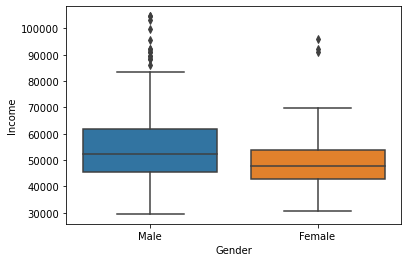

In [74]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit) 

In [75]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [76]:
income_male.mean()

56562.75961538462

In [77]:
income_female.mean()

49828.90789473684

In [78]:
# Ho : mu_male = mu_female( Income of both males and females are similar)
# Ha1 : mu_male > mu_female ( Income of males are significantly better than females)

t_stat,p_value=ttest_ind(income_male,income_female,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
    print("Reject Ho")
else : 
    print("Fail to Reject Ho")

t_stat :  2.752488637540257
p_value :  0.003263631548607129
Reject Ho
